<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import sys

In [3]:
sys.path

['C:\\Users\\Suzu\\Documents\\GitHub\\Funix_Assignments\\DSP303x_asm2_linhnnFX10540@funix.edu.vn',
 'C:\\Users\\Suzu\\anaconda3\\python38.zip',
 'C:\\Users\\Suzu\\anaconda3\\DLLs',
 'C:\\Users\\Suzu\\anaconda3\\lib',
 'C:\\Users\\Suzu\\anaconda3',
 '',
 'C:\\Users\\Suzu\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Suzu\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Suzu\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Suzu\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Suzu\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Suzu\\.ipython']

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
#TO DO:
df = pd.read_csv('pima-indians-diabetes.csv',header=None,names=["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [ ]:
#TO DO:
Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skinfold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)

(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)
df.head()

(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [ ]:
#TO DO:

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

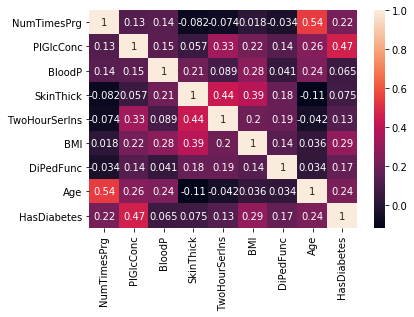

In [ ]:
#TO DO:
%matplotlib inline


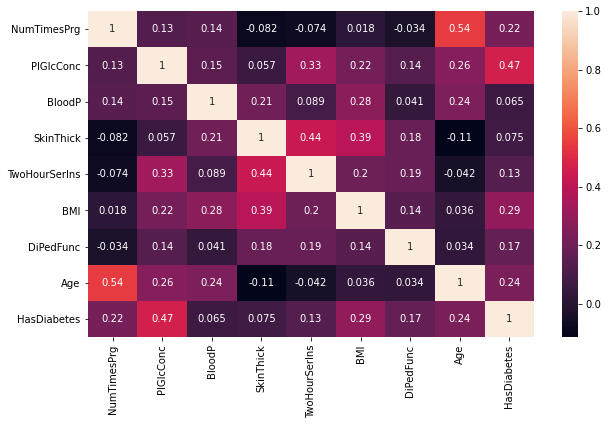

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

0      148
1       85
2      183
3       89
4      137
5      116
6       78
7      115
8      197
9      125
10     110
11     168
12     139
13     189
14     166
15     100
16     118
17     107
18     103
19     115
20     126
21      99
22     196
23     119
24     143
25     125
26     147
27      97
28     145
29     117
      ... 
738     99
739    102
740    120
741    102
742    109
743    140
744    153
745    100
746    147
747     81
748    187
749    162
750    136
751    121
752    108
753    181
754    154
755    128
756    137
757    123
758    106
759    190
760     88
761    170
762     89
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64


In [6]:
df['PlGlcConc']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

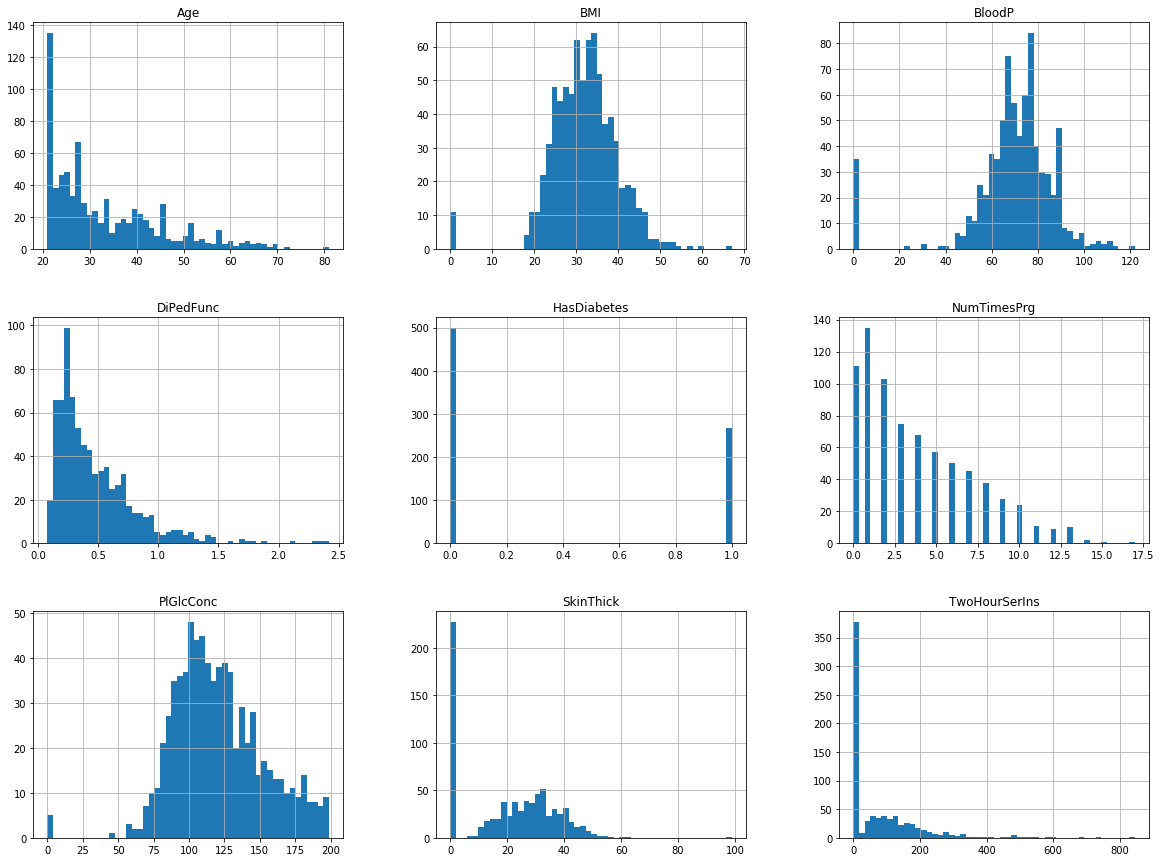

In [ ]:
#TO DO:

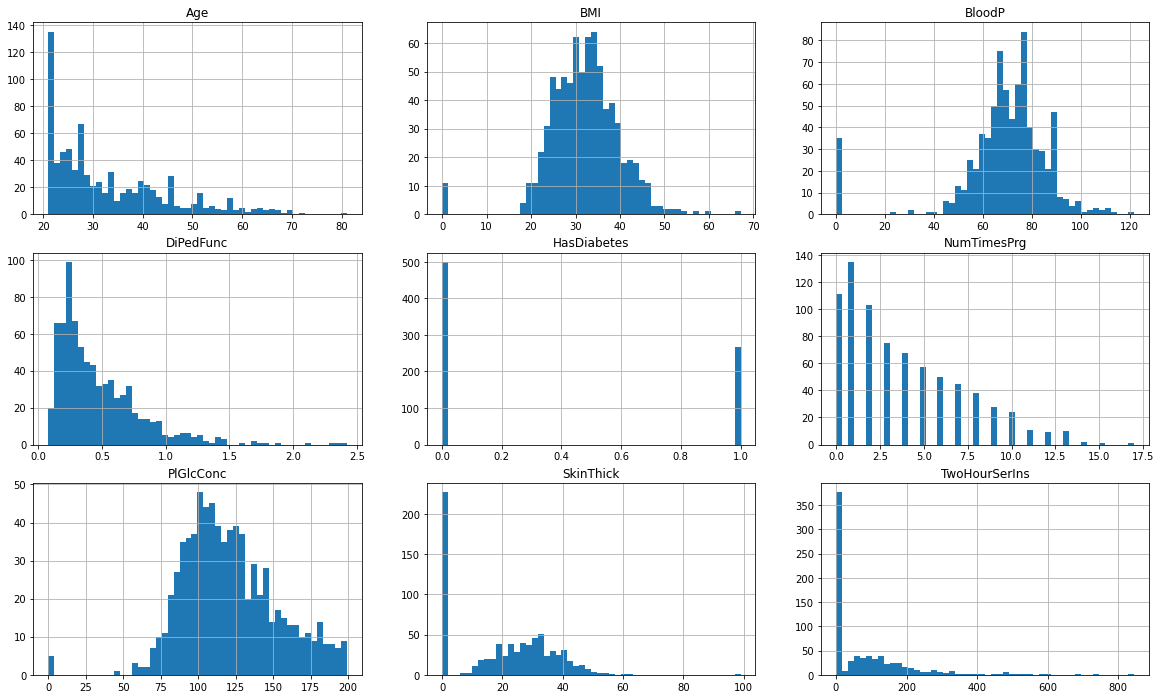

In [7]:
fig, ax = plt.subplots(3,3)
fig.set_figwidth(20)
fig.set_figheight(12)
list_col = [['Age','BMI','BloodP'],['DiPedFunc','HasDiabetes','NumTimesPrg'],['PlGlcConc','SkinThick','TwoHourSerIns']]
for i,col in zip(range(3),list_col):
    for j in range(3):
        ax[i][j].hist(df[col[j]],bins=50)
        ax[i][j].set(title=col[j])
        ax[i][j].grid()
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [8]:
#TO DO:
list_col_med = ['PlGlcConc','BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']
for c,i in zip(list_col_med,range(1,6)):
    li = df[df[c] == 0][c].index.values.tolist()
    for idx in li:
        df.iloc[idx,i] = np.median(df[c])

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [ ]:
#TO DO:

C:\Users\haina\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\haina\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
ss = preprocessing.StandardScaler()
df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,0.639947,0.866045,-0.031990,0.831114,-0.617667,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.610526,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.606956,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.013128,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.691375,1.549885,5.484909,-0.020496,1


# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [10]:
#TO DO:
y = df.iloc[:,-1].values
X = df.iloc[:,:-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:


Cần phải làm chuẩn hóa dữ liệu vì mỗi loại dữ liệu (một cột) có 1 đơn vị khác nhau, có khoảng dữ liệu khác nhau, nếu đưa vào mô hình thì mô hình học ko chính xác
Việc chia dữ liệu làm các tập training và test để tăng độ chính xác và dùng tập test để kiểm thử, đánh giá mô hình

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [ ]:
#TO DO:

0.3489583333333333
0.3485342019543974
0.35064935064935066


In [12]:
print(df[df['HasDiabetes'] == 1]['HasDiabetes'].count() / df.shape[0])
print(np.count_nonzero(y_train==1) / y_train.shape[0])
print(np.count_nonzero(y_test==1) / y_test.shape[0])

0.3489583333333333
0.34364820846905536
0.37012987012987014


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [13]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [14]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_hat_knn = knn.predict(X_test)
print(knn.get_params())
print(f1_score(y_test,y_hat_knn))
print(jaccard_score(y_test,y_hat_knn))
print(accuracy_score(y_test,y_hat_knn))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.594059405940594
0.4225352112676056
0.7337662337662337


In [17]:
#TO DO:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1, 31),'weights':['uniform','distance'],'algorithm':['ball_tree', 'kd_tree', 'brute'], 'leaf_size':np.arange(1,31)}
cv_knn = GridSearchCV(knn,param_grid_knn,cv=5)
cv_knn.fit(X_train, y_train)
print(cv_knn.best_params_)
print(cv_knn.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 25, 'weights': 'uniform'}
0.7654938024790084


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:


Trong thuật toán KNN chọn các tham số:\
-số lượng điểm lân cận, \
-cách đánh trọng số là uniform (các điểm lân cận được đánh giá giống nhau), \
-thuật toán, leaf_size

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
#TO DO:

f1_scores: 
 {'train': {'KNN': 0.6596306068601584, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6236559139784946, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores: 
 {'train': {'KNN': 0.7899022801302932, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [20]:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm = 'ball_tree', weights = 'uniform', leaf_size = 1).fit(X_train,y_train)

y_train_hat_knn = knn.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_knn))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_knn))
print('Accuracy score train: %.4f' % accuracy_score(y_train, y_train_hat_knn))

y_hat_knn = knn.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_knn))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_knn))
print('Accuracy score test: %.4f' % accuracy_score(y_test,y_hat_knn))

F1-score train: 0.6556
Jaccard score train: 0.4877
Accuracy score train: 0.7964
F1-score test: 0.6804
Jaccard score test: 0.5156
Accuracy score test: 0.7987


In [21]:
f1_scores['train']['KNN'] = f1_score(y_train,y_train_hat_knn)
f1_scores['test']['KNN'] = f1_score(y_test,y_hat_knn)
jaccard_scores['train']['KNN'] = accuracy_score(y_test,y_hat_knn)
jaccard_scores['test']['KNN'] = accuracy_score(y_train, y_train_hat_knn)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7964169381107492, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [22]:
from sklearn import tree

In [23]:
dctree = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_hat_dc = dctree.predict(X_test)
print(dctree.get_params())
print(f1_score(y_test,y_hat_dc))
print(jaccard_score(y_test,y_hat_dc))
print(accuracy_score(y_test,y_hat_dc))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
0.6666666666666667
0.5
0.7467532467532467


In [24]:
#TO DO:
dctree = tree.DecisionTreeClassifier()
param_grid_dctree = {'criterion':['gini', 'entropy'], 'max_features':['auto', 'sqrt', 'log2', None],
                     'random_state':[42],'min_samples_split': np.arange(2, 15), 'min_samples_leaf':np.arange(2, 15)}
cv_dectree = GridSearchCV(dctree, param_grid_dctree, cv = 5 )
cv_dectree.fit(X_train,y_train)
print(cv_dectree.best_params_)
print(cv_dectree.best_score_)

{'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 2, 'random_state': 42}
0.7475009996001599


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

Với mô hình Decision Tree, ta dùng các tham số: \
-criterion, là hàm đo lường chất lượng của việc phân chia, \
-gini: Gini impurity, entropy: information gain\
-max_feature: The number of features to consider when looking for the best split\
-random_state: Controls the randomness of the estimator\
-min_samples_split: The minimum number of samples required to split an internal node\
-min_samples_leaf: The minimum number of samples required to be at a leaf node

### TO DO:


In [ ]:
#TO DO:

f1_scores: 
 {'train': {'KNN': 0.6596306068601584, 'DT': 0.6509433962264151, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6236559139784946, 'DT': 0.62, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores: 
 {'train': {'KNN': 0.7899022801302932, 'DT': 0.758957654723127, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [25]:
dctree = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = None, min_samples_leaf = 12, min_samples_split = 2, random_state = 42).fit(X_train,y_train)
y_train_hat_dctree = knn.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_dctree))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_dctree))
print("Accuracy score train: %.4f" % accuracy_score(y_train, y_train_hat_dctree))
y_hat_dctree = dctree.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_dctree))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_dctree))
print("Accuracy score test: %.4f" % accuracy_score(y_test, y_hat_dctree))

F1-score train: 0.6556
Jaccard score train: 0.4877
Accuracy score train: 0.7964
F1-score test: 0.6789
Jaccard score test: 0.5139
Accuracy score test: 0.7727


In [26]:
f1_scores['train']['DT'] = f1_score(y_train,y_train_hat_dctree)
f1_scores['test']['DT'] = f1_score(y_test,y_hat_dctree)
jaccard_scores['train']['DT'] = dctree.score(X_train,y_train)
jaccard_scores['test']['DT'] = dctree.score(X_test,y_test)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0.6556473829201104, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.6788990825688075, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0.8469055374592834, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7964169381107492, 'DT': 0.7727272727272727, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC().fit(X_train,y_train)
y_hat_test_svc = svc.predict(X_test)
print(svc.get_params())
print(f1_score(y_test, y_hat_test_svc))
print(jaccard_score(y_test, y_hat_test_svc))
print(accuracy_score(y_test,y_hat_test_svc))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.7524752475247524
0.6031746031746031
0.8376623376623377


In [29]:
#TO DO:
svc = SVC()
param_grid_svc = {'kernel':['linear','rbf'],
                  'C':np.arange(1,5.1,0.1),
                  'degree':np.arange(3,6),
                  'coef0':np.arange(0.01,3,0.5),
                  'gamma': ['auto', 'scale']
                  }
cv_svc = GridSearchCV(svc, param_grid_svc,cv=5)
cv_svc.fit(X_train,y_train)
print(cv_svc.best_params_)
print(cv_svc.best_score_)

{'C': 2.4000000000000012, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
0.7671064907370386


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

Với mô hình Support vector machine, các tham số được điều chỉnh là:\
-C: Regularization parameter. The strength of the regularization is inversely proportional to C\
-coef0: Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.\
-gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.\
-kernel: Specifies the kernel type to be used in the algorithm\
-degree: Degree of the polynomial kernel function ('poly')

### TO DO:


In [ ]:
#TO DO:

f1_scores: 
 {'train': {'KNN': 0.6596306068601584, 'DT': 0.6509433962264151, 'SVM': 0.6141304347826086, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6236559139784946, 'DT': 0.62, 'SVM': 0.6464646464646464, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores: 
 {'train': {'KNN': 0.7899022801302932, 'DT': 0.758957654723127, 'SVM': 0.7687296416938111, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [30]:
svc = SVC(C=2.4,coef0=0.01,gamma='auto',kernel='linear').fit(X_train, y_train)
y_train_hat_svc = svc.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_svc))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_svc))
print("Accuracy score train: %.4f" % accuracy_score(y_train, y_train_hat_svc))
y_hat_svc = svc.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_svc))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_svc))
print("Accuracy score test: %.4f" % accuracy_score(y_test, y_hat_svc))

F1-score train: 0.6270
Jaccard score train: 0.4567
Accuracy score train: 0.7752
F1-score test: 0.6327
Jaccard score test: 0.4627
Accuracy score test: 0.7662


In [31]:
f1_scores['train']['SVM'] = f1_score(y_train,y_train_hat_svc)
f1_scores['test']['SVM'] = f1_score(y_test,y_hat_svc)
jaccard_scores['train']['SVM'] = accuracy_score(y_train, y_train_hat_svc)
jaccard_scores['test']['SVM'] = accuracy_score(y_test, y_hat_svc)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0.6556473829201104, 'SVM': 0.6270270270270271, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.6788990825688075, 'SVM': 0.6326530612244897, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0.8469055374592834, 'SVM': 0.7752442996742671, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7964169381107492, 'DT': 0.7727272727272727, 'SVM': 0.7662337662337663, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression().fit(X_train,y_train)
y_hat_lr = lr.predict(X_test)
print(lr.get_params())
print(f1_score(y_test,y_hat_lr))
print(jaccard_score(y_test,y_hat_lr))
print(accuracy_score(y_test,y_hat_lr))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.6464646464646465
0.47761194029850745
0.7727272727272727


In [34]:
#TO DO:
lr = LogisticRegression()
param_grid_lr = {"C":np.arange(0.1, 1.1, 0.1),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
cv_lr = GridSearchCV(lr,param_grid_lr,cv=5)
cv_lr.fit(X_train,y_train)
print(cv_lr.best_params_)
print(cv_lr.best_score_)

{'C': 0.30000000000000004, 'solver': 'newton-cg'}
0.773610555777689


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

Mô hình Logistic regression, các tham số được điều chỉnh là:\
-C: Inverse of regularization strength\
-solver: Algorithm to use in the optimization problem

### TO DO:


In [ ]:
#TO DO:

f1_scores: 
 {'train': {'KNN': 0.6596306068601584, 'DT': 0.6509433962264151, 'SVM': 0.6141304347826086, 'LR': 0.6243386243386243, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6236559139784946, 'DT': 0.62, 'SVM': 0.6464646464646464, 'LR': 0.6534653465346535, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores: 
 {'train': {'KNN': 0.7899022801302932, 'DT': 0.758957654723127, 'SVM': 0.7687296416938111, 'LR': 0.7687296416938111, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [35]:
lr = LogisticRegression(C=0.3,solver='sag').fit(X_train, y_train)
y_train_hat_lr = lr.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_lr))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_lr))
print("Accuracy score train: %.4f" % accuracy_score(y_train, y_train_hat_lr))
y_hat_lr = lr.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_lr))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_lr))
print("Accuracy score test: %.4f" % accuracy_score(y_test, y_hat_lr))

F1-score train: 0.6344
Jaccard score train: 0.4646
Accuracy score train: 0.7785
F1-score test: 0.6600
Jaccard score test: 0.4925
Accuracy score test: 0.7792


In [50]:
f1_scores['train']['LR'] = f1_score(y_train,y_train_hat_lr)
f1_scores['test']['LR'] = f1_score(y_test,y_hat_lr)
jaccard_scores['train']['LR'] = accuracy_score(y_train, y_train_hat_lr)
jaccard_scores['test']['LR'] = accuracy_score(y_test, y_hat_lr)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0.6556473829201104, 'SVM': 0.6270270270270271, 'LR': 0.6344086021505376, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.6788990825688075, 'SVM': 0.6326530612244897, 'LR': 0.66, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0.8469055374592834, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7964169381107492, 'DT': 0.7727272727272727, 'SVM': 0.7662337662337663, 'LR': 0.7792207792207793, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [37]:
from sklearn.ensemble import VotingClassifier

In [78]:
#TO DO:
#create a dictionary of our models
clf1 = KNeighborsClassifier(n_neighbors = 25, algorithm = 'ball_tree', weights = 'uniform', leaf_size = 1)
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = None, min_samples_leaf = 12, min_samples_split = 2, random_state = 42)
clf3 = SVC(C=2.4,coef0=0.01,gamma='auto',kernel='linear', probability = True)
clf4 = LogisticRegression(C=0.3,solver='sag')
#create our voting classifier, inputting our models
eclf_soft = VotingClassifier(estimators=[
        ('knn', clf1), ('dt', clf2), ('svc', clf3), ('lr', clf4)], voting='soft')
eclf_soft = eclf_soft.fit(X_train, y_train)

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [ ]:
#TO DO:


f1_scores: 
 {'train': {'KNN': 0.6596306068601584, 'DT': 0.6509433962264151, 'SVM': 0.6141304347826086, 'LR': 0.6243386243386243, 'EN_HARD': 0, 'EN_SOFT': 0.6541554959785523}, 'test': {'KNN': 0.6236559139784946, 'DT': 0.62, 'SVM': 0.6464646464646464, 'LR': 0.6534653465346535, 'EN_HARD': 0, 'EN_SOFT': 0.6808510638297872}}
jaccard_scores: 
 {'train': {'KNN': 0.7899022801302932, 'DT': 0.758957654723127, 'SVM': 0.7687296416938111, 'LR': 0.7687296416938111, 'EN_HARD': 0, 'EN_SOFT': 0.7899022801302932}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0, 'EN_SOFT': 0.8051948051948052}}


In [79]:
y_train_hat_eclf_soft = eclf_soft.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_eclf_soft))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_eclf_soft))
print("Accuracy score train: %.4f" % accuracy_score(y_train, y_train_hat_eclf_soft))
y_hat_eclf_soft = eclf_soft.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_eclf_soft))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_eclf_soft))
print("Accuracy score test: %.4f" % accuracy_score(y_test, y_hat_eclf_soft))

F1-score train: 0.6810
Jaccard score train: 0.5163
Accuracy score train: 0.8062
F1-score test: 0.6800
Jaccard score test: 0.5152
Accuracy score test: 0.7922


In [80]:
f1_scores['train']['EN_SOFT'] = f1_score(y_train,y_train_hat_eclf_soft)
f1_scores['test']['EN_SOFT'] = f1_score(y_test,y_hat_eclf_soft)
jaccard_scores['train']['EN_SOFT'] = accuracy_score(y_train, y_train_hat_eclf_soft)
jaccard_scores['test']['EN_SOFT'] = accuracy_score(y_test, y_hat_eclf_soft)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0.6556473829201104, 'SVM': 0.6270270270270271, 'LR': 0.6344086021505376, 'EN_HARD': 0.638655462184874, 'EN_SOFT': 0.6809651474530831}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.6788990825688075, 'SVM': 0.6326530612244897, 'LR': 0.66, 'EN_HARD': 0.6526315789473685, 'EN_SOFT': 0.6799999999999999}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0.8469055374592834, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0.7899022801302932, 'EN_SOFT': 0.8061889250814332}, 'test': {'KNN': 0.7964169381107492, 'DT': 0.7727272727272727, 'SVM': 0.7662337662337663, 'LR': 0.7792207792207793, 'EN_HARD': 0.7857142857142857, 'EN_SOFT': 0.7922077922077922}}


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [82]:
#TO DO:
#create a dictionary of our models
clf1 = KNeighborsClassifier(n_neighbors = 25, algorithm = 'ball_tree', weights = 'uniform', leaf_size = 1)
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = None, min_samples_leaf = 12, min_samples_split = 2, random_state = 42)
clf3 = SVC(C=2.4,coef0=0.01,gamma='auto',kernel='linear',probability = True)
clf4 = LogisticRegression(C=0.3,solver='sag')
#create our voting classifier, inputting our models
eclf_hard = VotingClassifier(estimators=[
        ('knn', clf1), ('dt', clf2), ('svc', clf3), ('lr', clf4)], voting='hard')
eclf_hard = eclf_hard.fit(X_train, y_train)

In [ ]:
#TO DO:

{'train': {'KNN': 0.6596306068601584, 'DT': 0.6509433962264151, 'SVM': 0.6141304347826086, 'LR': 0.6243386243386243, 'EN_HARD': 0.6361185983827493, 'EN_SOFT': 0.6541554959785523}, 'test': {'KNN': 0.6236559139784946, 'DT': 0.62, 'SVM': 0.6464646464646464, 'LR': 0.6534653465346535, 'EN_HARD': 0.5934065934065933, 'EN_SOFT': 0.6808510638297872}}
{'train': {'KNN': 0.7899022801302932, 'DT': 0.758957654723127, 'SVM': 0.7687296416938111, 'LR': 0.7687296416938111, 'EN_HARD': 0.7801302931596091, 'EN_SOFT': 0.7899022801302932}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0.7597402597402597, 'EN_SOFT': 0.8051948051948052}}


In [83]:
y_train_hat_eclf_hard = eclf_hard.predict(X_train)
print("F1-score train: %.4f" % f1_score(y_train, y_train_hat_eclf_hard))
print("Jaccard score train: %.4f" % jaccard_score(y_train, y_train_hat_eclf_hard))
print("Accuracy score train: %.4f" % accuracy_score(y_train, y_train_hat_eclf_hard))
y_hat_eclf_hard = eclf_hard.predict(X_test)
print("F1-score test: %.4f" % f1_score(y_test, y_hat_eclf_hard))
print("Jaccard score test: %.4f" % jaccard_score(y_test, y_hat_eclf_hard))
print("Accuracy score test: %.4f" % accuracy_score(y_test, y_hat_eclf_hard))

F1-score train: 0.6387
Jaccard score train: 0.4691
Accuracy score train: 0.7899
F1-score test: 0.6526
Jaccard score test: 0.4844
Accuracy score test: 0.7857


In [84]:
f1_scores['train']['EN_HARD'] = f1_score(y_train,y_train_hat_eclf_hard)
f1_scores['test']['EN_HARD'] = f1_score(y_test,y_hat_eclf_hard)
jaccard_scores['train']['EN_HARD'] = accuracy_score(y_train, y_train_hat_eclf_hard)
jaccard_scores['test']['EN_HARD'] = accuracy_score(y_test, y_hat_eclf_hard)
print('f1_score:\n',f1_scores)
print('jaccard_score:\n',jaccard_scores)

f1_score:
 {'train': {'KNN': 0.6556473829201104, 'DT': 0.6556473829201104, 'SVM': 0.6270270270270271, 'LR': 0.6344086021505376, 'EN_HARD': 0.638655462184874, 'EN_SOFT': 0.6809651474530831}, 'test': {'KNN': 0.6804123711340206, 'DT': 0.6788990825688075, 'SVM': 0.6326530612244897, 'LR': 0.66, 'EN_HARD': 0.6526315789473685, 'EN_SOFT': 0.6799999999999999}}
jaccard_score:
 {'train': {'KNN': 0.7987012987012987, 'DT': 0.8469055374592834, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0.7899022801302932, 'EN_SOFT': 0.8061889250814332}, 'test': {'KNN': 0.7964169381107492, 'DT': 0.7727272727272727, 'SVM': 0.7662337662337663, 'LR': 0.7792207792207793, 'EN_HARD': 0.7857142857142857, 'EN_SOFT': 0.7922077922077922}}


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [ ]:
#TO DO:


,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.789902,0.659631,0.772727,0.623656
1,Decistion Tree,0.758958,0.650943,0.753247,0.620000
2,SVM,0.768730,0.614130,0.772727,0.646465
3,Logistic Regression,0.768730,0.624339,0.772727,0.653465
4,Hard Voting,0.780130,0.636119,0.759740,0.593407
5,Soft Voting,0.789902,0.654155,0.805195,0.680851


In [85]:
df_result = pd.DataFrame(columns=['Algorithm','Jaccard-training','F1-score-training','Jaccard-testing','F1-score-testing'])
df_result['Algorithm']=['KNN','Decision Tree','SVM','Logistic Regression','Hard Voting','Soft Voting']
df_result['Jaccard-training'] = jaccard_scores['train'].values()
df_result['Jaccard-testing'] = jaccard_scores['test'].values()
df_result['F1-score-training'] = f1_scores['train'].values()
df_result['F1-score-testing'] = f1_scores['test'].values()
df_result

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.798701,0.655647,0.796417,0.680412
1,Decision Tree,0.846906,0.655647,0.772727,0.678899
2,SVM,0.775244,0.627027,0.766234,0.632653
3,Logistic Regression,0.778502,0.634409,0.779221,0.660000
4,Hard Voting,0.789902,0.638655,0.785714,0.652632
5,Soft Voting,0.806189,0.680965,0.792208,0.680000


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:


Nhìn vào kết quả của các mô hình thì ta thấy Emsemble Methods không tốt hơn các mô hình độc lập. Vì các mô hình cho kết quả gần tương đương nhau, nên việc tổng hợp từ các mô hình nay trong Ensemble Methods không đưa ra được kết quả tốt hơn.